# Lobatto and Chebyshev interpolation

In [1]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from sympy.core import S, Dummy, pi
from sympy.functions.combinatorial.factorials import factorial
from sympy.functions.elementary.trigonometric import sin, cos
from sympy.functions.elementary.miscellaneous import sqrt
from sympy.functions.special.gamma_functions import gamma
from sympy.polys.orthopolys import legendre_poly, laguerre_poly, hermite_poly, jacobi_poly
from sympy.polys.rootoftools import RootOf

In [2]:
def gauss_lobatto(n, n_digits):
    r"""
    Computes the Gauss-Legendre quadrature [1]_ points and weights.

    The Gauss-Lobatto quadrature approximates the integral:

    .. math::
        \int_{-1}^1 f(x)\,dx \approx \sum_{i=1}^n w_i f(x_i)

    The nodes `x_i` of an order `n` quadrature rule are the roots of `P'_(n-1)`
    and the weights `w_i` are given by:

    .. math::
        w_i = \frac{2}{n(n-1) \left[P_{n-1}(x_i)\right]^2},\quad x\neq\pm 1
        w_i = \frac{2}{n(n-1)},\quad x=\pm 1

    Parameters
    ==========

    n : the order of quadrature

    n_digits : number of significant digits of the points and weights to return

    Returns
    =======

    (x, w) : the ``x`` and ``w`` are lists of points and weights as Floats.
             The points `x_i` and weights `w_i` are returned as ``(x, w)``
             tuple of lists.

    Examples
    ========

    >>> #from sympy.integrals.quadrature import gauss_lobatto
    >>> x, w = gauss_lobatto(3, 5)
    >>> x
    [-1, 0, 1]
    >>> w
    [0.33333, 1.3333, 0.33333]
    >>> x, w = gauss_lobatto(4, 5)
    >>> x
    [-1, -0.44721, 0.44721, 1]
    >>> w
    [0.16667, 0.83333, 0.83333, 0.16667]

    See Also
    ========

    gauss_legendre,gauss_laguerre, gauss_gen_laguerre, gauss_hermite, gauss_chebyshev_t,\
    gauss_chebyshev_u, gauss_jacobi

    References
    ==========

    .. [1] http://en.wikipedia.org/wiki/Gaussian_quadrature#Gauss.E2.80.93Lobatto_rules
    .. [2] http://people.math.sfu.ca/~cbm/aands/page_888.htm
    """
    x = Dummy("x")
    p = legendre_poly(n-1, x, polys=True)
    pd = p.diff(x)
    xi = []
    w  = []
    for r in pd.real_roots():
        if isinstance(r, RootOf):
            r = r.eval_rational(S(1)/10**(n_digits+2))
        xi.append(r.n(n_digits))
        w.append((2/(n*(n-1) * p.subs(x, r)**2)).n(n_digits))
    
    xi.insert(0, -1)
    xi.append(1)
    w.insert(0,(S(2)/(n*(n-1))).n(n_digits))
    w.append((S(2)/(n*(n-1))).n(n_digits))
    
    return xi, w

In [3]:
%matplotlib notebook
plt.style.use("ggplot")

In [4]:
y = sym.symbols('y')

Gauss-Lobatto quadrature can integrate exactly polynomials up to $2n-3$, where $n$ is the number of points used

## Fourth order polynomial

<IPython.core.display.Javascript object>


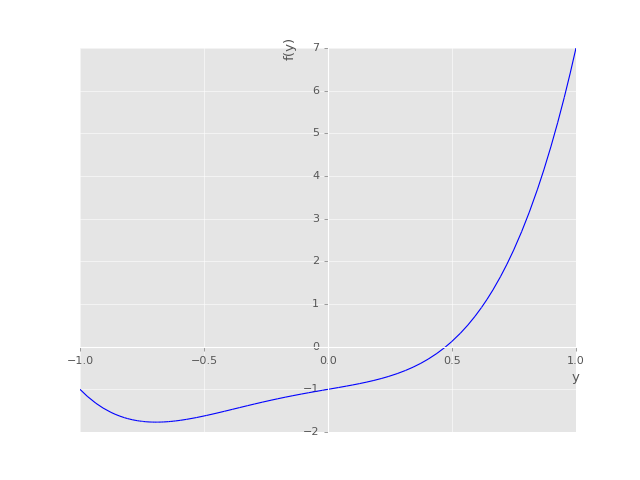

In [5]:
poly = 4*y**4 + 3*y**3 + y - 1
sym.plot(poly, (y, -1, 1));

In [6]:
print(sym.integrate(poly,(y,-1,1)))
print(sym.integrate(poly,(y,-1,1)).n(8))

-2/5
-0.40000000


In [7]:
for k in range(2,10):
    xi, w = gauss_lobatto(k, 8)
    poly_int = sum(w[j]*poly.subs(y, xi[j]) for j in range(k))
    print(k, poly_int)

2 6.0000000
3 0.66666667
4 -0.40000000
5 -0.40000000
6 -0.40000000
7 -0.40000000
8 -0.40000000
9 -0.40000000


## Fifth order polynomial

<IPython.core.display.Javascript object>


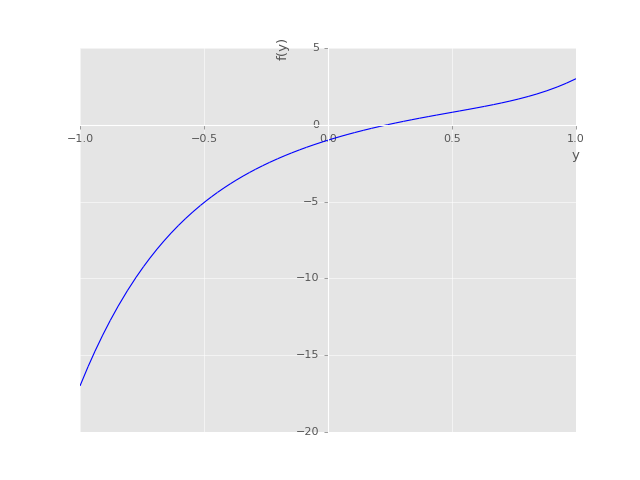

In [8]:
poly = 2*y**5 - 2*y**4 + 3*y**3 - 4*y**2  + 5*y - 1
sym.plot(poly, (y, -1, 1));

In [9]:
print(sym.integrate(poly,(y,-1,1)))
print(sym.integrate(poly,(y,-1,1)).n(8))

-82/15
-5.4666667


In [10]:
for k in range(2,10):
    xi, w = gauss_lobatto(k, 8)
    poly_int = sum(w[j]*poly.subs(y, xi[j]) for j in range(k))
    print(k, poly_int)

2 -14.000000
3 -6.0000000
4 -5.4666667
5 -5.4666667
6 -5.4666667
7 -5.4666667
8 -5.4666667
9 -5.4666667


## Trascendent function

<IPython.core.display.Javascript object>


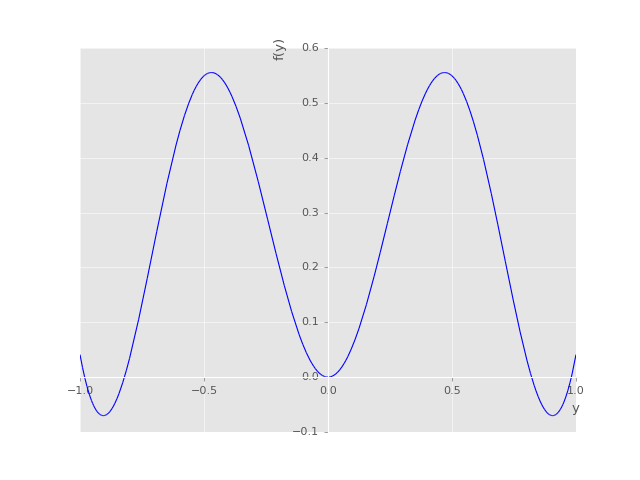

In [11]:
fun = y*sym.sin(5*y) + y**2
sym.plot(fun, (y, -1, 1));

In [12]:
fun_int = sym.integrate(fun,(y,-1,1))
print(fun_int)
print(fun_int.n(8))

-2*cos(5)/5 + 2*sin(5)/25 + 2/3
0.47648785


In [13]:
print("{}\t{}\t{}".format('n', 'Integral', 'Relative error'))
print("===========================================")
for k in range(2,20):
    xi, w = gauss_lobatto(k, 8)
    poly_int = sum(w[j]*fun.subs(y, xi[j]) for j in range(k))
    print("{}\t{}\t{}".format(k, float(poly_int), float((fun_int - poly_int)/poly_int)))

n	Integral	Relative error
2	0.0821514506737	4.80011488259
3	0.027383816904	16.4003446056
4	0.933433420263	-0.48953204331
5	0.381288445645	0.249678180132
6	0.48623530045	-0.0200467748469
7	0.475875933472	0.00128587588386
8	0.476514071062	-5.50250332342e-05
9	0.476487031109	1.72040244723e-06
10	0.476487871346	-4.29955194288e-08
11	0.47648784975	2.32630894947e-09
12	0.476487849619	2.54300561481e-09
13	0.476487850528	6.94897244055e-10
14	0.47648785095	-2.48946810218e-10
15	0.476487850553	7.00193794494e-10
16	0.476487850467	9.38803083512e-10
17	0.476487850257	1.14711144529e-09
18	0.476487850304	1.22253587094e-09
19	0.47648785107	-5.01521965971e-10


## Comparison of Lobatto and Chebyshev nodes

<IPython.core.display.Javascript object>


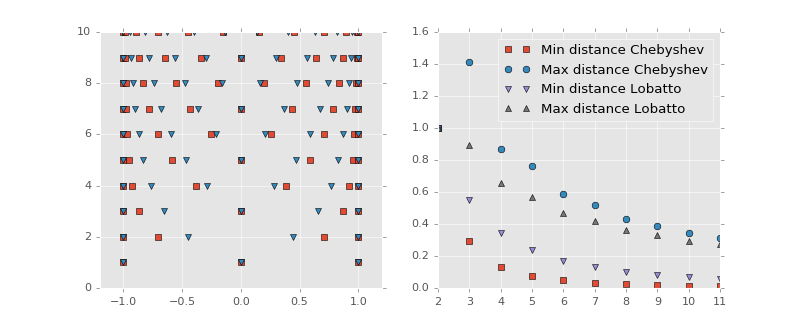

In [14]:
norder = 10

min_cheb = []
max_cheb = []
min_lob = []
max_lob = []
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
x_cheb = []
x_lob = []
y = []
for n in range(1, norder + 1):
    x_ch = [np.cos((2*i - 1)/(2*n)*np.pi) for i in range(n, 0, -1)]
    x_ch = [-1] + x_ch + [1]
    x_cheb += x_ch
    x_lo, _ = gauss_lobatto(n + 2, 16)
    x_lob += x_lo
    dx_cheb = [x_ch[k + 1] - x_ch[k] for k in range(0, n + 1)]
    dx_lob = [x_lo[k + 1] - x_lo[k] for k in range(0, n + 1)]
    min_cheb.append(min(dx_cheb))
    max_cheb.append(max(dx_cheb))
    min_lob.append(min(dx_lob))
    max_lob.append(max(dx_lob))
    y += [n for i in range(n + 2)]
    
plt.plot(x_cheb, y, marker='s', lw=0)
plt.plot(x_lob, y, marker='v', lw=0)

#%%
plt.xlim(-1.2, 1.2)
plt.ylim(0, norder)
plt.subplot(1, 2, 2)
plt.plot(range(2, norder + 2), min_cheb, label="Min distance Chebyshev",
         marker="s", lw=0)
plt.plot(range(2, norder + 2), max_cheb, label="Max distance Chebyshev",
         marker="o", lw=0)
plt.plot(range(2, norder + 2), min_lob, label="Min distance Lobatto",
         marker="v", lw=0)
plt.plot(range(2, norder + 2), max_lob, label="Max distance Lobatto",
         marker="^", lw=0)
plt.legend(loc="best")
plt.show()

In [15]:
from IPython.core.display import HTML
def css_styling():
    styles = open('./styles/custom_barba.css', 'r').read()
    return HTML(styles)
css_styling()